# Data Science Aplicada à Área de Saúde

## Modelagem Preditiva em Registros Eletrônicos de Saúde

Nosso objetivo neste projeto será prever se um paciente poderá ser readmitido em uma clínica no período de 30 dias após alta. Para isso, faremos a construção de diversos modelos preditivos usando registros eletrônicos de saúde de uma clínica fictícia.

Esse projeto terá como base uma pesquisa realizada em 2018, chamada:

Using Electronic Health Records and Machine Learning to Make Medical-Related Predictions from Non-Medical Data

https://ieeexplore.ieee.org/document/8614004

## Modelagem Preditiva

A modelagem preditiva emprega Matemática, Estatística e Programação para prever resultados. 

Na maioria das vezes, o evento que se deseja prever está no futuro, mas a modelagem preditiva pode ser aplicada a qualquer tipo de evento desconhecido, independentemente de quando ele ocorreu. Por exemplo, modelos preditivos são frequentemente usados para detectar crimes e identificar suspeitos, depois que o crime ocorreu.

Em muitos casos, o modelo é escolhido com base na teoria de detecção para tentar adivinhar a probabilidade de um resultado, dada uma quantidade definida de dados de entrada. Os modelos podem usar um ou mais classificadores na tentativa de determinar a probabilidade de um registro (observação) de dados pertencer a uma classe ou outra. Por exemplo, um modelo pode ser usado para determinar se um email é spam ou não spam. Ou podemos usar regressão para prever valores numéricos, como o valor de vendas no próximo período ou o custo médico com base em um novo tipo de tratamento.

Dependendo dos limites de definição, modelagem preditiva é sinônimo ou amplamente sobreposto ao campo de aprendizado de máquina (Machine Learning), como é mais comumente referido em contextos acadêmicos ou de pesquisa e desenvolvimento. Quando implantada comercialmente, a modelagem preditiva geralmente é chamada de análise preditiva.

A modelagem preditiva geralmente é contrastada com a modelagem / análise causal. No primeiro, pode-se ficar totalmente satisfeito em utilizar indicadores ou variáveis explicativas para o prever resultado de interesse. Neste último, procura-se determinar verdadeiras relações de causa e efeito. Essa distinção deu origem a uma literatura crescente nos campos de métodos e estatísticas de pesquisa e à afirmação comum de que "a correlação não implica causalidade".

### Registros Eletrônicos de Saúde (Electronic Health Records)

Um Registro Eletrônico de Saúde (Electronic Health Records - EHR) é uma versão digital da ficha de papel de um paciente. Os EHRs são registros em tempo real, centrados no paciente, que tornam as informações disponíveis instantânea e seguramente para usuários autorizados. Embora um EHR contenha os históricos médicos e de tratamento dos pacientes, um sistema de EHR é construído para ir além dos dados clínicos coletados no consultório de um prestador de serviços e pode incluir uma visão mais ampla do atendimento de um paciente. Os EHRs são uma parte vital da TI em saúde e podem:

- Conter o histórico médico do paciente, diagnósticos, medicamentos, planos de tratamento, datas de imunização, alergias, imagens de radiologia e resultados laboratoriais e de testes.


- Permitir acesso a ferramentas baseadas em evidências que os provedores podem usar para tomar decisões sobre o atendimento de um paciente.


- Automatiza e simplifica o fluxo de trabalho do provedor.

Um dos principais recursos de um EHR é que as informações de saúde podem ser criadas e gerenciadas por provedores autorizados em um formato digital capaz de ser compartilhado com outros provedores em mais de uma organização de saúde. Os EHRs são construídos para compartilhar informações com outros prestadores de cuidados de saúde e organizações - como laboratórios, especialistas, instalações de imagens médicas, farmácias, instalações de emergência e clínicas de escolas e locais de trabalho - para que eles contenham informações de todos os clínicos envolvidos no atendimento de um paciente.

## Carregando os Dados e Compreendendo as Variáveis

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Para atualizar a versão do Pandas (descomente a linha abaixo e execute esta célula)
#!pip install -U pandas

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
# Imports para carga e manipulação de dados
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [3]:
np.__version__

'1.18.1'

In [4]:
pd.__version__

'1.0.1'

In [5]:
sns.__version__

'0.9.0'

In [6]:
import matplotlib
matplotlib.__version__

'3.2.0'

In [7]:
# Carregando os dados
dataset = pd.read_csv('dados/dataset.csv', index_col = [0])
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Dicionário de Dados

- IDADE - Idade do paciente (numérica)
- SEXO_F - paciente do sexo feminino (categórica)
- SEXO_M - paciente do sexo masculino (categórica)
- ADM_CORRENTE_DIAS - Dias desde a admissão atual (numérica)
- RECEB_MEDICAMENTOS - Recebeu medicamentos na última internação (categórica)
- FEZ_EXAMES - Fez exames na última internação (categórica)
- DEPEND_QUIMICO - Dependendo químico (categórica)
- FUMANTE - Fumante (categórica)
- ALCOOLISMO - Alcoolismo (categórica)
- NUM_DIAS_INT_PREVIA - Número de internações anteriores (numérica)
- ADM_PREVIA_DIAS - Dias da admissão anterior (numérica)
- NUM_DIAS_LIC_MEDICA - Licença médica (numérica)
- READMISSAO_30_DIAS - Readmissão dentro de 30 dias após a alta. Variável target. 0 - Não / 1 - Sim

### Análise Exploratória

In [8]:
# Shape
dataset.shape

(117180, 13)

In [9]:
# Tipos de Dados
dataset.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [10]:
# Resumo Estatístico
dataset.describe()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
count,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000
mean,65.066522,0.428239,0.571761,4.707680,0.160266,0.237020,0.597440,0.005274,0.008269,5.301988,12.328179,0.314456,0.189384
std,17.965229,0.494826,0.494826,6.257739,0.366854,0.425256,0.490416,0.072430,0.090559,14.324146,26.846820,3.366208,0.391815
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000,0.000000
max,114.000000,1.000000,1.000000,307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,627.000000,315.000000,1.000000


In [11]:
# Verificando se temos valores ausentes
# Total por variável
dataset.isnull().sum()

IDADE                  0
SEXO_F                 0
SEXO_M                 0
ADM_CORRENTE_DIAS      0
RECEB_MEDICAMENTOS     0
FEZ_EXAMES             0
DEPEND_QUIMICO         0
FUMANTE                0
ALCOOLISMO             0
NUM_DIAS_INT_PREVIA    0
ADM_PREVIA_DIAS        0
NUM_DIAS_LIC_MEDICA    0
READMISSAO_30_DIAS     0
dtype: int64

In [12]:
# Total de linhas por coluna
dataset.count() 

IDADE                  117180
SEXO_F                 117180
SEXO_M                 117180
ADM_CORRENTE_DIAS      117180
RECEB_MEDICAMENTOS     117180
FEZ_EXAMES             117180
DEPEND_QUIMICO         117180
FUMANTE                117180
ALCOOLISMO             117180
NUM_DIAS_INT_PREVIA    117180
ADM_PREVIA_DIAS        117180
NUM_DIAS_LIC_MEDICA    117180
READMISSAO_30_DIAS     117180
dtype: int64

In [13]:
# Linhas contendo dados duplicados
linha_duplicadas = dataset[dataset.duplicated()]
print("Número de linhas duplicadas: ", linha_duplicadas.shape[0])

# São realmente dados duplicados?

Número de linhas duplicadas:  60839


In [14]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [15]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

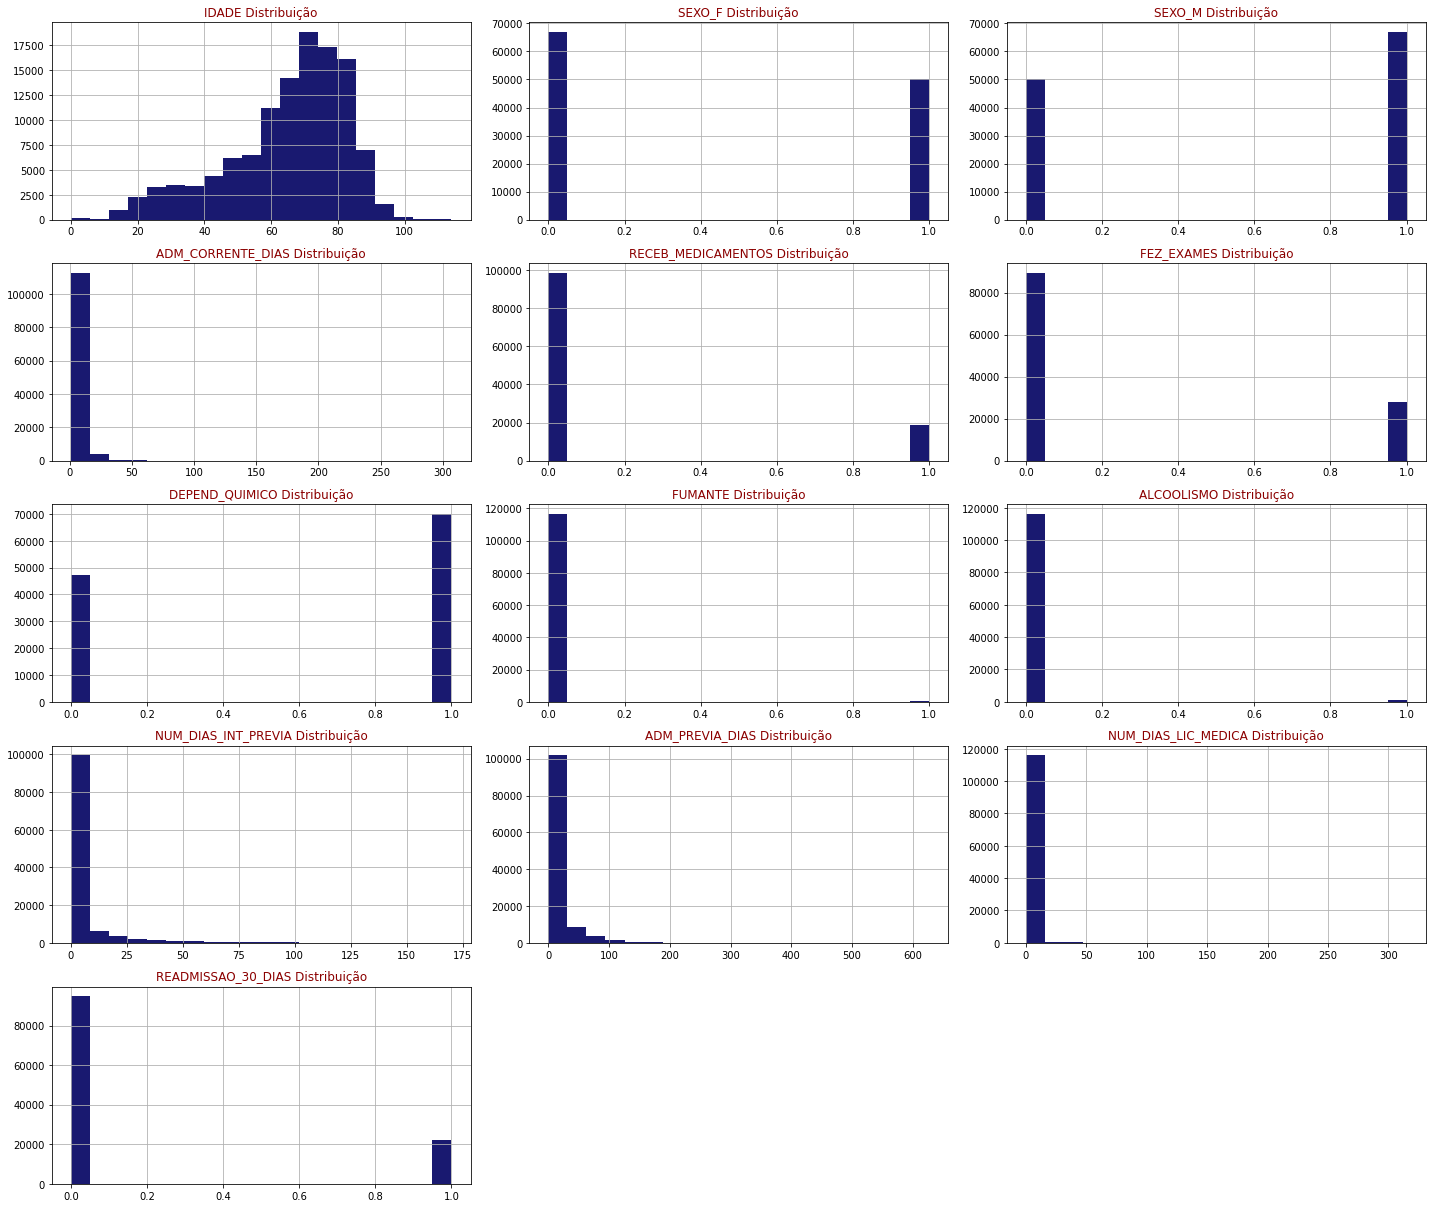

In [16]:
# Executa a função
cria_histograma(dataset, dataset.columns, 6, 3)

### Checando Outliers

Um outlier é um ponto ou conjunto de pontos que são muito diferentes de outros pontos, valores extremos. Às vezes, eles podem ser muito altos ou muito baixos. Geralmente, é uma boa ideia detectar e remover os valores discrepantes. 

Os valores discrepantes são uma das principais razões para um modelo menos preciso. 

Por isso, é uma boa ideia removê-los.

In [17]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


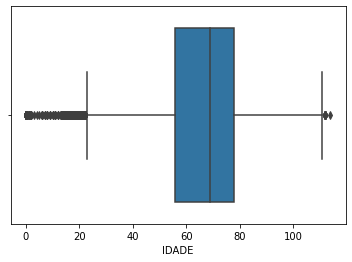

In [18]:
# Visualizando os outliers da variável IDADE
sns.boxplot(dataset.IDADE)

Na estatística descritiva, um gráfico de caixa (Boxplot) é um método para representar graficamente grupos de dados numéricos através de seus quartis. Os gráficos de caixa também podem ter linhas que se estendem verticalmente (ou horizontalmente) a partir das caixas (bigodes), indicando variabilidade fora dos quartis superior e inferior. Os outliers podem ser plotados como pontos individuais.

A definição acima sugere que, se houver um outlier, ele será plotado como ponto no boxplot.

O gráfico acima mostra dois pontos bem acima de 100 anos, estes são outliers, pois não estão incluídos na caixa, ou seja, nenhum lugar perto dos quartis. O mesmo raciocínio para os pontos abaixo de 20 anos.

In [19]:
# Outliers para a variável IDADE
outliers_idade = dataset[(dataset['IDADE'] > 110) | (dataset['IDADE'] < 5)] 
outliers_idade.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
5204,0.0,0,1,3,1,0,0,0,0,0,0,0,0
9588,0.0,1,0,1,0,1,0,0,0,0,0,0,0
12103,2.0,1,0,1,1,0,0,0,0,1,3,0,0
19961,0.0,0,1,13,0,0,1,0,0,0,0,0,0
21779,0.0,0,1,2,0,0,1,0,0,0,0,0,0


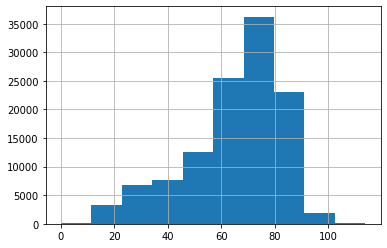

In [20]:
# Histograma da variável IDADE antes da limpeza
dataset.IDADE.hist()

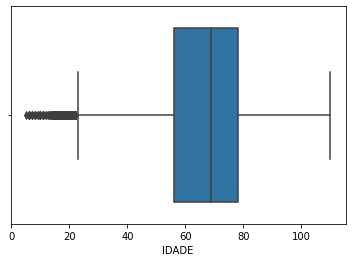

In [21]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['IDADE'] > 110) | (dataset['IDADE'] < 5)].index)
sns.boxplot(dataset.IDADE)

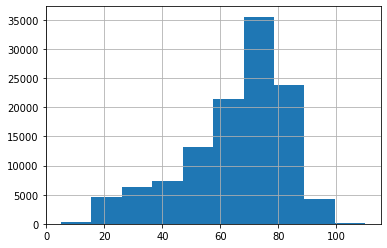

In [22]:
# Histograma da variável idade após a limpeza
dataset.IDADE.hist()

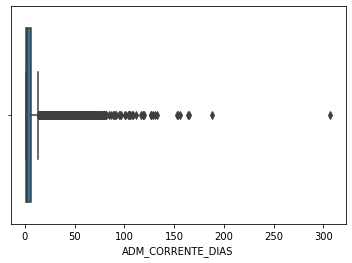

In [23]:
# Visualizando os outliers da variável ADM_CORRENTE_DIAS
sns.boxplot(dataset.ADM_CORRENTE_DIAS)

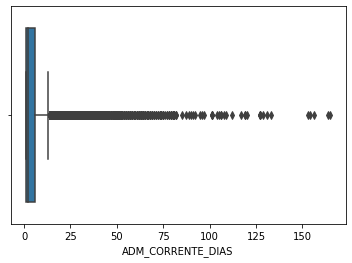

In [24]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['ADM_CORRENTE_DIAS'] > 180)].index)
sns.boxplot(dataset.ADM_CORRENTE_DIAS)

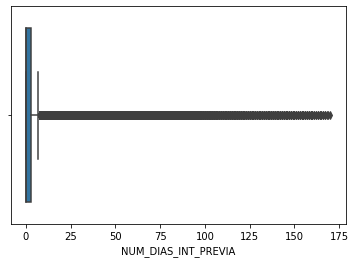

In [25]:
# Visualizando os outliers da variável NUM_DIAS_INT_PREVIA
sns.boxplot(dataset.NUM_DIAS_INT_PREVIA)

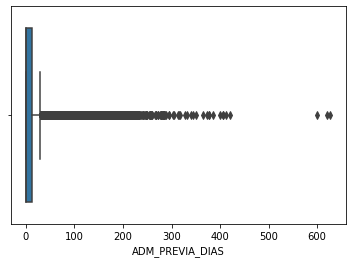

In [26]:
# Visualizando os outliers da variável ADM_PREVIA_DIAS
sns.boxplot(dataset.ADM_PREVIA_DIAS)

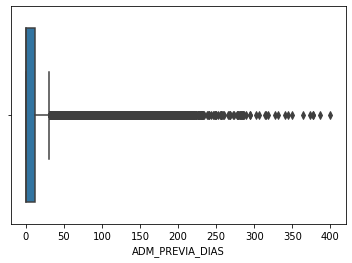

In [27]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['ADM_PREVIA_DIAS'] > 400)].index)
sns.boxplot(dataset.ADM_PREVIA_DIAS)

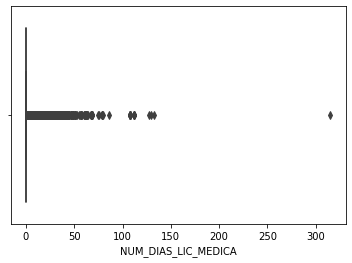

In [28]:
# Visualizando os outliers da variável NUM_DIAS_LIC_MEDICA
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA)

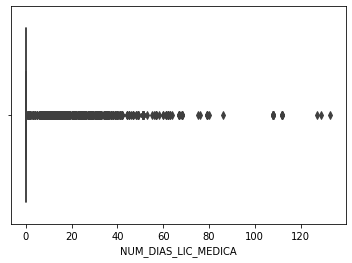

In [29]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['NUM_DIAS_LIC_MEDICA'] > 150)].index)
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA)

### Correlação e Associação

In [30]:
# Criando uma cópia do dataset original
dataset_teste = dataset.copy()

In [31]:
# Cópia do dataset
dataset_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [32]:
dataset_teste.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [33]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
# Como queremos apenas avaliar a associação com a variável resposta estamos trabalhando com uma cópia do dataset original.
dataset_teste['SEXO_F'] = dataset_teste['SEXO_F'].astype('category')
dataset_teste['SEXO_M'] = dataset_teste['SEXO_M'].astype('category')
dataset_teste['RECEB_MEDICAMENTOS'] = dataset_teste['RECEB_MEDICAMENTOS'].astype('category')
dataset_teste['FEZ_EXAMES'] = dataset_teste['FEZ_EXAMES'].astype('category')
dataset_teste['DEPEND_QUIMICO'] = dataset_teste['DEPEND_QUIMICO'].astype('category')
dataset_teste['FUMANTE'] = dataset_teste['FUMANTE'].astype('category')
dataset_teste['ALCOOLISMO'] = dataset_teste['ALCOOLISMO'].astype('category')
dataset_teste['READMISSAO_30_DIAS'] = dataset_teste['READMISSAO_30_DIAS'].astype('category')

In [34]:
# Visualizando os tipos de dados
dataset_teste.dtypes

IDADE                   float64
SEXO_F                 category
SEXO_M                 category
ADM_CORRENTE_DIAS         int64
RECEB_MEDICAMENTOS     category
FEZ_EXAMES             category
DEPEND_QUIMICO         category
FUMANTE                category
ALCOOLISMO             category
NUM_DIAS_INT_PREVIA       int64
ADM_PREVIA_DIAS           int64
NUM_DIAS_LIC_MEDICA       int64
READMISSAO_30_DIAS     category
dtype: object

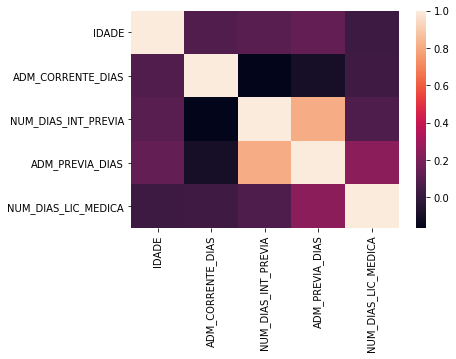

In [35]:
# Coeficiente de correlação é calculado para variáveis numéricas
dataset_teste_corr = dataset_teste.corr()
sns.heatmap(dataset_teste_corr)

In [36]:
# Função para calcular a associação entre variáveis categóricas

# Pacote stats do Scipy
import scipy.stats as ss

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Em Estatística, Cramér-V é uma medida de associação entre duas variáveis categóricas, fornecendo um valor 
# entre 0 e +1 (inclusive). É baseado na estatística do qui-quadrado (chi2) de Pearson e foi publicado 
# por Harald Cramér em 1946. 

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [37]:
# Coleta as variáveis categóricas do dataset
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in dataset_teste:
    if is_string_dtype(dataset_teste[column]):
        categorical_vars.append(column)

In [38]:
categorical_vars

['SEXO_F',
 'SEXO_M',
 'RECEB_MEDICAMENTOS',
 'FEZ_EXAMES',
 'DEPEND_QUIMICO',
 'FUMANTE',
 'ALCOOLISMO',
 'READMISSAO_30_DIAS']

In [39]:
y = 'READMISSAO_30_DIAS'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(dataset_teste[var], dataset_teste[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável SEXO_F com a variável resposta: 0.08140312484489556
Associação da Variável SEXO_M com a variável resposta: 0.08140312484489556
Associação da Variável RECEB_MEDICAMENTOS com a variável resposta: 0.14274972262281213
Associação da Variável FEZ_EXAMES com a variável resposta: 0.3512134549958696
Associação da Variável DEPEND_QUIMICO com a variável resposta: 0.21078933128660998
Associação da Variável FUMANTE com a variável resposta: 0.08791877346862986
Associação da Variável ALCOOLISMO com a variável resposta: 0.0151160465712889
Associação da Variável READMISSAO_30_DIAS com a variável resposta: 0.9999721770541886


### Pré-Processamento

In [40]:
#!pip install imblearn

In [41]:
#!pip install tensorflow

In [42]:
#!pip install keras

In [43]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [44]:
# Verificando se a variável resposta está balanceada
target_count = dataset.READMISSAO_30_DIAS.value_counts()
target_count

0    94827
1    22173
Name: READMISSAO_30_DIAS, dtype: int64

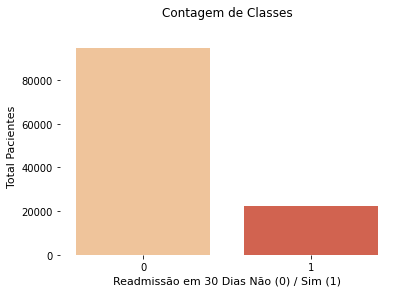

In [45]:
# Plot 
sns.countplot(dataset.READMISSAO_30_DIAS, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [46]:
# Variáveis Explicativas
dataset.iloc[:, 0:12]  

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
ID,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0
1,24.0,0,1,2,0,0,1,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129995,79.0,0,1,1,1,0,0,0,0,1,1,0
129996,61.0,0,1,1,0,1,0,0,0,1,9,0
129997,52.0,0,1,4,1,0,0,0,0,0,0,0


In [47]:
# Variável Target
dataset.iloc[:, -1] 

ID
0         1
1         0
2         0
3         0
4         0
         ..
129995    0
129996    1
129997    0
129998    0
129999    0
Name: READMISSAO_30_DIAS, Length: 117000, dtype: int64

In [48]:
# Importa a função
# Se necessário, instale o pacote: 
# pip install imblearn
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = dataset.iloc[:, 0:12]  
y = dataset.iloc[:, -1] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

Using TensorFlow backend.


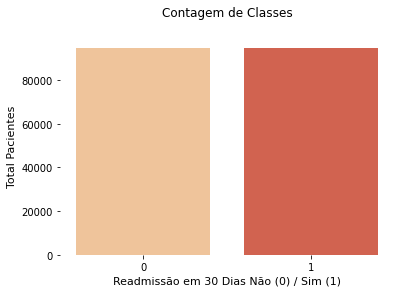

In [49]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [50]:
# Split em X e Y
X = X_res
Y = y_res

In [51]:
X.shape

(189654, 12)

In [52]:
Y.shape

(189654,)

In [53]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = 7)

In [54]:
X_treino.shape

(170688, 12)

In [55]:
Y_treino.shape

(170688,)

In [56]:
X_teste.shape

(18966, 12)

In [57]:
Y_teste.shape

(18966,)

## Construção dos Modelos Preditivos

In [58]:
# Imports
import keras
import tensorflow
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc

In [59]:
tensorflow.__version__

'2.1.0'

In [60]:
keras.__version__

'2.3.1'

In [61]:
sklearn.__version__

'0.22.2'

#### Versão 1 - Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [62]:
# Cria e treina o modelo
modelo_v1 = LogisticRegression(max_iter = 600)
modelo_v1.fit(X_treino, Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Previsões (probabilidades)
previsoes_v1 = modelo_v1.predict_proba(X_teste)
previsoes_v1

array([[0.73235991, 0.26764009],
       [0.18340222, 0.81659778],
       [0.00190397, 0.99809603],
       ...,
       [0.19791024, 0.80208976],
       [0.00248856, 0.99751144],
       [0.20003318, 0.79996682]])

In [64]:
# Previsões (classes)
previsoes_v1 = modelo_v1.predict(X_teste)
previsoes_v1

array([0, 1, 1, ..., 1, 1, 1])

<img src="imagens/matriz.png" alt="Drawing"/>

In [65]:
matriz_v1 = confusion_matrix(Y_teste, previsoes_v1)
print(matriz_v1)

[[7814 1688]
 [2669 6795]]


In [66]:
# Relatório de classificação
classe_names = ['Não Readmitido (0)', 'Readmitido (1)']
report = classification_report(Y_teste, previsoes_v1, target_names = classe_names)
print(report)

                    precision    recall  f1-score   support

Não Readmitido (0)       0.75      0.82      0.78      9502
    Readmitido (1)       0.80      0.72      0.76      9464

          accuracy                           0.77     18966
         macro avg       0.77      0.77      0.77     18966
      weighted avg       0.77      0.77      0.77     18966



* Score AUC

AUC é uma abreviação de Área Sob a Curva. É usado na análise de classificação para determinar quão bem o modelo prediz a classe de saída.

Um exemplo de sua aplicação são as curvas ROC. Aqui, as taxas de verdadeiros positivos são plotadas contra taxas de falsos positivos. Quanto mais próxima a AUC de um modelo chegar a 1, melhor será. Assim, os modelos com AUCs mais altas são preferíveis aos modelos com AUCs mais baixas.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [67]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v1))

0.7701685639700714


In [68]:
# Extrai as taxas de verdadeiros e falsos positivos
taxa_falso_positivo, taxa_verdadeiro_positivo, thresholds = roc_curve(Y_teste, previsoes_v1)

In [69]:
taxa_falso_positivo

array([0.        , 0.17764681, 1.        ])

In [70]:
taxa_verdadeiro_positivo

array([0.        , 0.71798394, 1.        ])

In [71]:
thresholds

array([2, 1, 0])

In [72]:
# Score AUC
print(auc(taxa_falso_positivo, taxa_verdadeiro_positivo))

0.7701685639700714


In [73]:
# Score AUCROC - Caso 1
y_pred_class = modelo_v1.predict(X_teste)
print(roc_auc_score(Y_teste, y_pred_class))

0.7701685639700714


In [74]:
# Score AUCROC - Caso 2
# Por que o resultado é diferente?
y_pred_probs = modelo_v1.predict_proba(X_teste)[:,1] # Usamos [:,1] para buscar as probabilidades da classe positiva.
print(roc_auc_score(Y_teste, y_pred_probs))

0.8353567076148759


A função predict() retorna apenas uma classe ou outra. Em seguida, você calcula um ROC com os resultados da previsão do modelo. Por outro lado, predict_proba() retorna uma gama inteira de probabilidades.

Ao usar o y_pred_class, você já decidiu o limite ou threshold (a função predict fez isso). Quando você usa y_pred_probs, você ainda não tem o limite, e a Curva ROC vai decidir o limite ao final. 

No Caso 1, você está usando a previsão (não as probabilidades), ou seja, a função já calculou o limite antes de calcular as classes previstas e isso é usado para calcular o AUC.

No Caso 2 estamos usando as probabilidades, ou seja, a função vai calcular o limite somente depois de criar a curva ROC, para então calcular o AUC.

Em resumo: 

- No Caso 1, a curva ROC é calculada para as duas classes com o limite (threshold) definido antes do cálculo do AUC.
- No Caso 2, a curva ROC é calculada para as duas classes com o limite (threshold) definido depois da criação da curva e então o AUC é calculado.


Por isso os valores são diferentes.

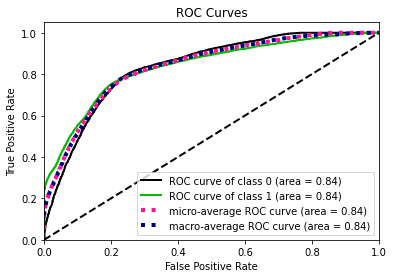

In [75]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_v1.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v1)
plt.show()

In [76]:
# Se as classes estiverem desbalanceadas, o ideal é usar a curva precision-recall 
from sklearn.metrics import precision_recall_curve

y_probs = modelo_v1.predict_proba(X_teste)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_teste, y_probs)

In [77]:
precision

array([0.49955133, 0.49952492, 0.49955129, ..., 1.        , 1.        ,
       1.        ])

In [78]:
recall

array([1.00000000e+00, 9.99894336e-01, 9.99894336e-01, ...,
       2.11327134e-04, 1.05663567e-04, 0.00000000e+00])

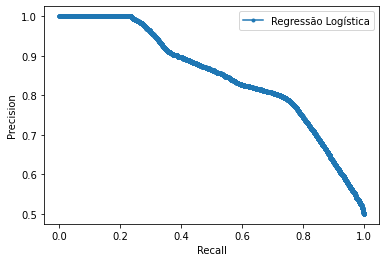

In [79]:
# Plot da curva precision-recall 
plt.plot(recall, precision, marker = '.', label = 'Regressão Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

* Coeficiente de Correlação de Matthews

O coeficiente de correlação de Matthews é usado em aprendizado de máquina como uma medida de qualidade em classificação binária, introduzido pelo bioquímico Brian W. Matthews em 1975. Ele leva em conta verdadeiros e falsos positivos e negativos e é geralmente considerado como um medida equilibrada, que pode ser usado mesmo se as classes são de tamanhos muito diferentes. 

O MCC é, em essência, um coeficiente de correlação entre as classificações binárias observadas e previstas; ele retorna um valor entre -1 e +1. Um coeficiente de 1 representa uma predição perfeita, 0 não melhor do que a previsão aleatória e -1 indica total discordância entre previsão e observação (inversão). 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

Embora não exista uma forma perfeita de descrever a matriz de confusão por um número único, o coeficiente de correlação Matthews é geralmente considerado como sendo um dos melhores para este fim. Outras medidas, como a proporção de previsões corretas (também denominado de precisão), não são úteis quando as duas classes são de tamanhos muito diferentes. Por exemplo, a atribuição de cada objeto para o conjunto maior alcança uma alta proporção de previsões corretas, mas geralmente não é uma classificação útil.

O MCC pode ser calculado diretamente a partir da matriz de confusão usando a fórmula:

<img src="imagens/mcc.png" alt="Drawing"/>

In [80]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(Y_teste, previsoes_v1))

0.5433656279602246


#### Versão 2 - RandomForest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

O RandomForest, como o próprio nome indica, consiste em um grande número de árvores de decisão individuais que funcionam como um conjunto. Cada árvore individual na "floresta aleatória" gera uma previsão de classe e a classe com mais votos se torna a previsão do nosso modelo.

<img src="imagens/randomforest.png" alt="Drawing"/>

O conceito fundamental por trás do RandomForest é simples, mas poderoso - a sabedoria das multidões. Em termos de ciência de dados, a razão pela qual esse modelo funciona tão bem é:

Um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê superará qualquer um dos modelos constituintes individuais.

A baixa correlação entre os modelos é a chave. Assim como os investimentos com baixas correlações (como ações e títulos) se juntam para formar um portfólio maior que a soma de suas partes, os modelos não correlacionados podem produzir previsões de conjuntos mais precisas do que as previsões individuais. 

A razão desse maravilhoso efeito é que as árvores se protegem de seus erros individuais (desde que nem sempre erram na mesma direção). Enquanto algumas árvores podem estar erradas, muitas outras estão certas, então, como um grupo, as árvores podem se mover na direção correta. Portanto, os pré-requisitos para um bom desempenho desse modelo são:

- É necessário que haja algum sinal real em nossos recursos, para que os modelos criados com esses recursos sejam melhores do que a adivinhação aleatória.

- As previsões (e, portanto, os erros) feitas pelas árvores individuais precisam ter baixas correlações entre si.

In [81]:
# Cria e treina o modelo
modelo_v2 = RandomForestClassifier(n_estimators = 150)
modelo_v2.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste)
matriz_v2 = confusion_matrix(Y_teste, previsoes_v2)
print(matriz_v2)

[[8120 1382]
 [1707 7757]]


In [83]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v2)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      9502
           1       0.85      0.82      0.83      9464

    accuracy                           0.84     18966
   macro avg       0.84      0.84      0.84     18966
weighted avg       0.84      0.84      0.84     18966



In [84]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v2))

0.8370946130840808


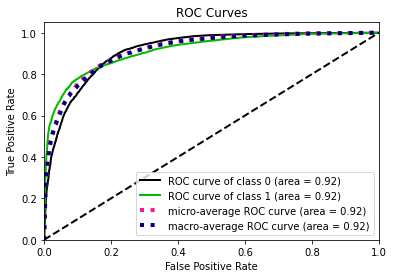

In [85]:
# Calcula a Curva ROC para cada classe
y_probs_v2 = modelo_v2.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v2)
plt.show()

In [86]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v2))

0.6746318956788458


In [87]:
X_treino.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
146799,76.00000,0,1,1,0,1,0,0,0,1,2,0
13873,54.00000,0,1,1,1,0,0,0,0,0,0,0
141112,53.00000,0,1,1,0,0,0,0,0,4,8,0
178346,42.94967,0,1,1,0,0,1,0,0,0,0,0
49564,73.00000,0,1,7,0,0,1,0,0,0,0,0


#### Versão 3 - Naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

Um classificador Naive Bayes é um modelo probabilístico de aprendizado de máquina usado para tarefas de classificação. 

O cerne do classificador é baseado no Teorema de Bayes. Usando o Teorema de Bayes, podemos encontrar a probabilidade de A acontecer, dado que B ocorreu. Aqui, B é a evidência e A é a hipótese. A suposição feita aqui é que os preditores / características são independentes, ou seja, a presença de um recurso em particular não afeta o outro. Por isso, é chamado ingênuo (naive).

<img src="imagens/naive1.png" alt="Drawing"/>

A fórmula considerando cada variável explicstiva x1, x2, ..., xn.

<img src="imagens/naive2.png" alt="Drawing"/>

No nosso caso, a variável de classe (y) tem apenas dois resultados, sim ou não. Pode haver casos em que a classificação possa ser multivariada. Portanto, precisamos encontrar a classe y com probabilidade máxima.

<img src="imagens/naive3.png" alt="Drawing"/>

Os algoritmos Naive Bayes são usados principalmente em análise de sentimentos, filtragem de spam, sistemas de recomendação etc. Eles são rápidos e fáceis de implementar, mas sua maior desvantagem é que o requisito dos preditores é independente. Na maioria dos casos da vida real, os preditores são dependentes, o que dificulta o desempenho do classificador.

In [88]:
# Cria e treina o modelo GaussianNB (variáveis quantitativas com distribuição normal)
modelo_v3 = GaussianNB()
modelo_v3.fit(X_treino, Y_treino)

# Cria e treina o modelo MultinomialNB (variáveis quantitativas discretas)
#modelo_v3 = MultinomialNB()
#modelo_v3.fit(X_treino, Y_treino)

# Cria e treina o modelo BernoulliNB (variáveis quantitativas discretas)
#modelo_v3 = BernoulliNB()
#modelo_v3.fit(X_treino, Y_treino)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
# Previsões
previsoes_v3 = modelo_v3.predict(X_teste)
matriz_v3 = confusion_matrix(Y_teste, previsoes_v3)
print(matriz_v3)

[[7685 1817]
 [3279 6185]]


In [90]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v3)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      9502
           1       0.77      0.65      0.71      9464

    accuracy                           0.73     18966
   macro avg       0.74      0.73      0.73     18966
weighted avg       0.74      0.73      0.73     18966



In [91]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v3))

0.7311531313512678


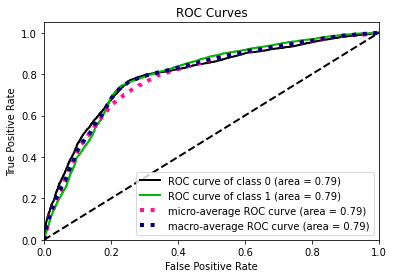

In [92]:
# Calcula a Curva ROC para cada classe
y_probs_v3 = modelo_v3.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v3)
plt.show()

In [93]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v3))

0.4680485116987696


#### Versão 4 - KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Algoritmo K-vizinhos mais próximos (ou K-Nearest Neighbors - KNN) é um dos algoritmos de classificação mais simples e é um dos algoritmos de aprendizado mais utilizados. 

O KNN é um algoritmo de aprendizado não paramétrico e "preguiçoso". Seu objetivo é usar um banco de dados no qual os pontos de dados são separados em várias classes para prever a classificação de um novo ponto de amostra.

Quando dizemos que uma técnica não é paramétrica, significa que ela não faz nenhuma suposição sobre a distribuição de dados. Em outras palavras, a estrutura do modelo é determinada a partir dos dados. Se você pensar bem, é bastante útil, porque no "mundo real", a maioria dos dados não obedece às suposições teóricas típicas feitas (como nos modelos de regressão linear, por exemplo). Portanto, o KNN poderia e provavelmente deveria ser uma das primeiras escolhas para um estudo de classificação quando há pouco ou nenhum conhecimento prévio sobre a distribuição dos dados.

O KNN também é um algoritmo "preguiçoso" (em oposição a um algoritmo "ganancioso"). O que isso significa é que ele não usa os pontos de dados de treinamento para fazer qualquer generalização. Em outras palavras, não há fase de treinamento explícita ou é muito mínima. Isso também significa que a fase de treinamento é bem rápida. A falta de generalização significa que o KNN mantém todos os dados de treinamento. Para ser mais exato, todos (ou a maioria) dos dados de treinamento são necessários durante a fase de teste.


<img src="imagens/knn.png" alt="Drawing"/>

O KNN pode ser usado para classificação - a saída é uma associação de classe (prevê uma classe - um valor discreto). Um objeto é classificado pelo voto majoritário de seus vizinhos, sendo o objeto atribuído à classe mais comum entre os k vizinhos mais próximos. Também pode ser usado para regressão - a saída é o valor do objeto (prevê valores contínuos). Este valor é a média (ou mediana) dos valores de seus k vizinhos mais próximos.

In [94]:
# Cria e treina o modelo
modelo_v4 = KNeighborsClassifier()
modelo_v4.fit(X_treino, Y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
# Previsões
previsoes_v4 = modelo_v4.predict(X_teste)
matriz_v4 = confusion_matrix(Y_teste, previsoes_v4)
print(matriz_v4)

[[7308 2194]
 [1605 7859]]


In [96]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v4)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      9502
           1       0.78      0.83      0.81      9464

    accuracy                           0.80     18966
   macro avg       0.80      0.80      0.80     18966
weighted avg       0.80      0.80      0.80     18966



In [97]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v4))

0.7997556082422831


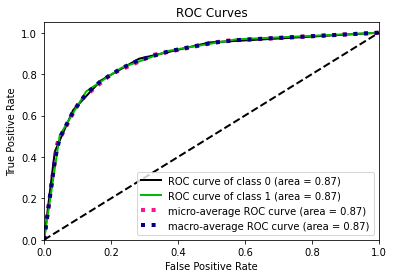

In [98]:
# Calcula a Curva ROC para cada classe
y_probs_v4 = modelo_v4.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v4)
plt.show()

In [99]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v4))

0.6005959471109272


### Validação Cruzada

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

Uma vez que terminamos de treinar nosso modelo, não podemos assumir que ele funcionará bem em dados que ainda não foram vistos. Em outras palavras, não podemos ter certeza de que o modelo terá a precisão e a variação desejadas no ambiente de produção. 

Precisamos de algum tipo de garantia da precisão das previsões que nosso modelo está divulgando. Para isso, precisamos validar nosso modelo. Esse processo, de decidir se os resultados numéricos que quantificam as relações entre variáveis ​​são aceitáveis​​ como descrições dos dados, é conhecido como validação.

A Validação Cruzada (CV - Cross Validation) é uma das técnicas usadas para testar a eficácia de modelos de aprendizado de máquina; também é um procedimento de re-amostragem usado para avaliar um modelo se tivermos dados limitados. Para executar o CV, fazemos divisões sucessivas nos dados, separando em treino e teste, mas fazendo com o que o algoritmo passe por todo conjunto de dados. As duas abordagens principais são:

- Train_Test Split approach
- K-Folds Cross Validation

Usaremos a segunda.

<img src="imagens/kfolds.png" alt="Drawing"/>

#### Como Funciona o K-Fold:

1- Dividimos os dados inteiros aleatoriamente em K-folds (o valor de k não deve ser muito pequeno ou muito alto; idealmente, escolhemos de 5 a 10, dependendo do tamanho dos dados). O valor mais alto de K leva a um modelo menos tendencioso (mas uma grande variância pode levar a um super ajuste), onde o valor mais baixo de K é semelhante à abordagem de divisão de teste e treino que vimos anteriormente.

2- Em seguida, ajustamos o modelo usando os K-folds - 1 (K menos 1) e validamos o modelo usando a Kth fold restante. Gravamos as métriicas / erros.

3- Repitimos esse processo até que cada K-fold sirva como conjunto de teste. Em seguida, calculamos a média das métricas gravadas. Essa será a métrica de desempenho final para o modelo.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [100]:
# Função para imprimir o resultado da validação cruzada

# Ao realizar a validação cruzada, podemos usar todos os nossos dados, tanto para treinamento quanto para teste, 
# enquanto avaliamos nosso algoritmo de aprendizado em exemplos nunca antes vistos.

# Observe que estamos usando X e Y

# Função para validação cruzada com duas métricas
def validacao_cruzada(modelo) :
    cv_results = cross_validate(modelo, X, Y, scoring = ['accuracy', 'roc_auc'], cv = 5)

    print('\nAcurácia em Teste:', float(format(np.mean(cv_results['test_accuracy']), '.3f')))
    print('AUC em Teste:', float(format(np.mean(cv_results['test_roc_auc']), '.3f')))
    print()

In [101]:
%%time
modelos = [LogisticRegression(max_iter = 4000), 
           RandomForestClassifier(n_estimators = 150), 
           GaussianNB(), 
           KNeighborsClassifier()]

for modelo in modelos:
    print("\nModelo e Parâmetros:", modelo)
    validacao_cruzada(modelo)


Modelo e Parâmetros: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Acurácia em Teste: 0.767
AUC em Teste: 0.833


Modelo e Parâmetros: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Acurácia em Teste: 0.821
AUC em Te

### Otimização de Hiperparâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Um hiperparâmetro é um parâmetro cujo valor é definido antes do início do processo de aprendizado.

Alguns exemplos de hiperparâmetros incluem penalidade na regressão logística e perda na descida do gradiente estocástico. No sklearn, os hiperparâmetros são passados como argumentos para o construtor das classes de modelo.

Principais Estratégias de Otimização de Hiperparâmetros:

- Pesquisa em grade (Grid Search)
- Pesquisa aleatória (Random Search)


In [102]:
# Imports
import pandas as pd
import numpy as np

# Função para o Grid Search
from sklearn.model_selection import GridSearchCV

# Classe para a otimização de hiperparâmetros
class OtimizaHiperparametros:

    # Construtor da classe
    def __init__(self, models, params):
        
        # Verfica se algum modelo não tem hiperparâmetros para otimização
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Alguns estimadores estão com parâmetros ausentes: %s" % missing_params)
            
        # Inicia os atributos da classe
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    # Método para executar o Grid Search
    def fit(self, X, y, cv = 3, n_jobs = 3, verbose = 1, scoring = None, refit = False):
        
        # Loop por cada modelo (chave)
        for key in self.keys:
            print("\nExecutando GridSearchCV Para o Modelo %s:" % key)
            model = self.models[key]
            params = self.params[key]
            
            # Cria o objeto Grid Search para cada modelo
            gs = GridSearchCV(model, 
                              params, 
                              cv = cv, 
                              n_jobs = n_jobs, 
                              verbose = verbose, 
                              scoring = scoring, 
                              refit = refit, 
                              return_train_score = True)
            
            # Executa o Grid Search 
            gs.fit(X,y)
            
            # Salva o nome do modelo que foi processado
            self.grid_searches[key] = gs    

    # Método para calcular o score (métrica final)
    def score_summary(self, sort_by = 'mean_score'):
        
        # Função para criar uma linha com cada resultado do Grid Search
        def row(key, scores, params):
            d = {
                 'modelo': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        
        # Para cada resultado, retorna o resultadoo formatado
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            # Junta tudo em uma única estrutura
            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        # Gera cada coluna
        columns = ['modelo', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [103]:
# Lista dos modelos para otimização
lista_modelos = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

lista_modelos

{'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', 

In [104]:
# Grid de parâmetros que serão testados
grid_parametros = {
    'LogisticRegression': { 'max_iter': [4000, 5000, 8000, 10000] },
    'RandomForestClassifier': { 'n_estimators': [175, 200, 225, 250] },
    'KNeighborsClassifier': { 'n_neighbors': [4, 5, 6, 7], 'metric': ['minkowski'], 'p': [1, 2, 3] }
}

grid_parametros

{'LogisticRegression': {'max_iter': [4000, 5000, 8000, 10000]},
 'RandomForestClassifier': {'n_estimators': [175, 200, 225, 250]},
 'KNeighborsClassifier': {'n_neighbors': [4, 5, 6, 7],
  'metric': ['minkowski'],
  'p': [1, 2, 3]}}

In [105]:
# Cria o otimizador de parâmetros (instância da classe)
otimizador_parametros = OtimizaHiperparametros(lista_modelos, grid_parametros)

In [106]:
%%time

# Executa o otimizador
otimizador_parametros.fit(X_treino, Y_treino, scoring = 'roc_auc', n_jobs = 2)


Executando GridSearchCV Para o Modelo LogisticRegression:
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   40.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.



Executando GridSearchCV Para o Modelo RandomForestClassifier:
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  2.4min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.



Executando GridSearchCV Para o Modelo KNeighborsClassifier:
Fitting 3 folds for each of 12 candidates, totalling 36 fits
CPU times: user 350 ms, sys: 186 ms, total: 536 ms
Wall time: 6min 44s


[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:  3.7min finished


In [107]:
# Sumário da otimização
otimizador_parametros.score_summary(sort_by = 'max_score')

LogisticRegression
RandomForestClassifier
KNeighborsClassifier


,modelo,min_score,mean_score,max_score,std_score,max_iter,n_estimators,metric,n_neighbors,p
7,RandomForestClassifier,0.90565,0.906088,0.906568,0.000375981,NaN,250,NaN,NaN,NaN
5,RandomForestClassifier,0.905474,0.906019,0.906439,0.000404089,NaN,200,NaN,NaN,NaN
6,RandomForestClassifier,0.905461,0.906046,0.906436,0.000421471,NaN,225,NaN,NaN,NaN
4,RandomForestClassifier,0.905408,0.905969,0.906264,0.000397016,NaN,175,NaN,NaN,NaN
11,KNeighborsClassifier,0.860853,0.862308,0.863938,0.00126549,NaN,NaN,minkowski,5,1
14,KNeighborsClassifier,0.861922,0.862583,0.863413,0.000620181,NaN,NaN,minkowski,6,1
17,KNeighborsClassifier,0.861973,0.86238,0.862699,0.000302828,NaN,NaN,minkowski,7,1
8,KNeighborsClassifier,0.857353,0.858864,0.860675,0.00137247,NaN,NaN,minkowski,4,1
12,KNeighborsClassifier,0.857199,0.858902,0.860281,0.00127906,NaN,NaN,minkowski,5,2
15,KNeighborsClassifier,0.858153,0.859055,0.859767,0.000672115,NaN,NaN,minkowski,6,2


#### Versão 5 - Deep Learning

https://keras.io/

<img src="imagens/deep.png" alt="Drawing"/>

In [108]:
X_treino.shape

(170688, 12)

In [109]:
# Construção do modelo com Keras
# Definimos diversas camadas e aplicamos regularização com dropout para evitar o overfitting
# http://papers.nips.cc/paper/4878-understanding-dropout.pdf
modelo_v5 = Sequential()
modelo_v5.add(Dense(256, input_dim = 12, activation = 'relu'))
modelo_v5.add(Dropout(0.5))
modelo_v5.add(Dense(256, activation = 'relu'))
modelo_v5.add(Dropout(0.5))
modelo_v5.add(Dense(1, activation = 'sigmoid'))
modelo_v5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [110]:
%%time

# Treinamos o modelo
history = modelo_v5.fit(X_treino, Y_treino, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.1)

Train on 153619 samples, validate on 17069 samples
Epoch 1/100
153619/153619 [==============================] - 3s 16us/step - loss: 0.6716 - accuracy: 0.6971 - val_loss: 0.5419 - val_accuracy: 0.7545
Epoch 2/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.5434 - accuracy: 0.7537 - val_loss: 0.5203 - val_accuracy: 0.7651
Epoch 3/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.5274 - accuracy: 0.7633 - val_loss: 0.5069 - val_accuracy: 0.7733
Epoch 4/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.5072 - accuracy: 0.7701 - val_loss: 0.4839 - val_accuracy: 0.7807
Epoch 5/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4940 - accuracy: 0.7746 - val_loss: 0.4713 - val_accuracy: 0.7839
Epoch 6/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4872 - accuracy: 0.7762 - val_loss: 0.4840 - val_accuracy: 0.7831
Epoch 7/100
153619/153619 [======================

Epoch 55/100
153619/153619 [==============================] - 2s 14us/step - loss: 0.4759 - accuracy: 0.7806 - val_loss: 0.4720 - val_accuracy: 0.7875
Epoch 56/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4773 - accuracy: 0.7800 - val_loss: 0.4724 - val_accuracy: 0.7876
Epoch 57/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4771 - accuracy: 0.7808 - val_loss: 0.4691 - val_accuracy: 0.7869
Epoch 58/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4760 - accuracy: 0.7805 - val_loss: 0.4686 - val_accuracy: 0.7877
Epoch 59/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4758 - accuracy: 0.7815 - val_loss: 0.4689 - val_accuracy: 0.7869
Epoch 60/100
153619/153619 [==============================] - 2s 14us/step - loss: 0.4760 - accuracy: 0.7803 - val_loss: 0.4655 - val_accuracy: 0.7876
Epoch 61/100
153619/153619 [==============================] - 2s 15us/step - loss: 0.4765 - ac

In [111]:
# Sumário do modelo
modelo_v5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3328      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________


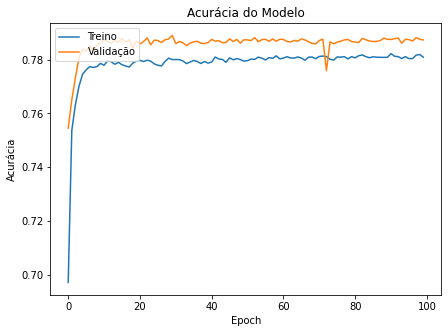

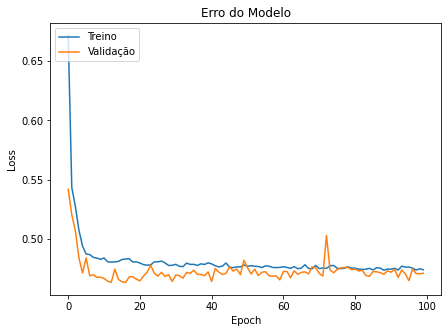

In [112]:
# Sumário da Acurácia
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

# Loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

In [113]:
# Previsões
previsoes_v5 = modelo_v5.predict_classes(X_teste)
matriz_v5 = confusion_matrix(Y_teste, previsoes_v5)
print(matriz_v5)

[[7742 1760]
 [2271 7193]]


In [114]:
# Relatório de Classificação
report = classification_report(Y_teste, previsoes_v5)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      9502
           1       0.80      0.76      0.78      9464

    accuracy                           0.79     18966
   macro avg       0.79      0.79      0.79     18966
weighted avg       0.79      0.79      0.79     18966



In [115]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v5))

0.7874069377750789


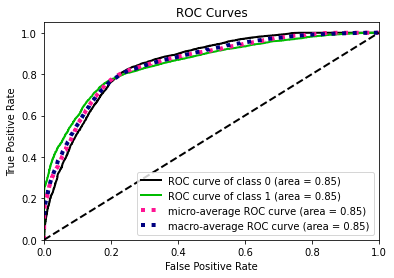

In [116]:
# Plot das métricas
import scikitplot as skplt
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(1)

# Calcula a Curva ROC para cada classe
y_probs_v5 = modelo_v5.predict_proba(X_teste)

# Precisamos usar esse procedimento pois o Keras apresenta apenas a probabilidade da classe prevista
skplt.metrics.plot_roc(Y_teste, np.concatenate((1 - y_probs_v5, y_probs_v5), axis = 1), ax = ax1)
plt.show()

In [117]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(Y_teste, previsoes_v5))

0.5757125829541148


### Comparando os Modelos

In [118]:
# Comparando o Score AUC dos modelos

# Cria lista vazia
lista_auc = []

# Calcula o Score AUC para cada modelo
auc_modelo_v1 = roc_auc_score(Y_teste, previsoes_v1)
auc_modelo_v2 = roc_auc_score(Y_teste, previsoes_v2)
auc_modelo_v3 = roc_auc_score(Y_teste, previsoes_v3)
auc_modelo_v4 = roc_auc_score(Y_teste, previsoes_v4)
auc_modelo_v5 = roc_auc_score(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_auc = [auc_modelo_v1, auc_modelo_v2, auc_modelo_v3, auc_modelo_v4, auc_modelo_v5]

In [119]:
# Comparando o Coeficiente de Correlação de Matthews dos modelos

# Cria lista vazia
lista_mcorr = []

# Calcula o Coeficiente para cada modelo
mcorr_v1 = matthews_corrcoef(Y_teste, previsoes_v1)
mcorr_v2 = matthews_corrcoef(Y_teste, previsoes_v2)
mcorr_v3 = matthews_corrcoef(Y_teste, previsoes_v3)
mcorr_v4 = matthews_corrcoef(Y_teste, previsoes_v4)
mcorr_v5 = matthews_corrcoef(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_mcorr = [mcorr_v1, mcorr_v2, mcorr_v3, mcorr_v4, mcorr_v5]

In [120]:
# Comparando a Acurácia dos modelos

# Cria lista vazia
lista_acc = []

# Calcula a Acurácia para cada modelo
acc_modelo_v1 = accuracy_score(Y_teste, previsoes_v1)
acc_modelo_v2 = accuracy_score(Y_teste, previsoes_v2)
acc_modelo_v3 = accuracy_score(Y_teste, previsoes_v3)
acc_modelo_v4 = accuracy_score(Y_teste, previsoes_v4)
acc_modelo_v5 = accuracy_score(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_acc = [acc_modelo_v1, acc_modelo_v2, acc_modelo_v3, acc_modelo_v4, acc_modelo_v5]

In [121]:
# Concatena as 3 listas de métricas em uma única tabela
lista_metricas = pd.DataFrame(np.column_stack([lista_auc, lista_mcorr, lista_acc]), 
                              columns = ['AUC', 'Matthews', 'Acurácia'])

# Adiciona uma coluna com os nomes dos modelos
lista_metricas['Modelo'] = ['Regressão Logística', 'RandomForest', 'Naive Bayes', 'KNN', 'Deep Learning']

In [122]:
# Lista as métricas por ordem decrescente do Score AUC
lista_metricas.sort_values(by ='AUC', ascending = False)

,AUC,Matthews,Acurácia,Modelo
1,0.837095,0.674632,0.837130,RandomForest
3,0.799756,0.600596,0.799694,KNN
4,0.787407,0.575713,0.787462,Deep Learning
0,0.770169,0.543366,0.770273,Regressão Logística
2,0.731153,0.468049,0.731309,Naive Bayes


### Preparando a Versão Final do Modelo

In [123]:
# Cria e treina o modelo
modelo_final_rf = RandomForestClassifier(n_estimators = 200)
modelo_final_rf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
# Salvando o modelo
import pickle
filename = 'modelos/modelo_final.sav'
pickle.dump(modelo_final_rf, open(filename, 'wb'))

In [125]:
# Carregando o Modelo
classificador_pacientes = pickle.load(open(filename, 'rb'))

In [126]:
classificador_pacientes

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Deploy do Modelo

O deploy de um modelo de Machine Learning consiste em entregar os resultados do modelo. Isso pode ser feito manualmente, de forma automatizada, via aplicação web, gerando arquivos csv com as previsões todos os dias à noite e então aliimentando um Dashboard, etc.... Em geral esse trabalho envolve um Engenheiro de Machine Learning e equpes de desenvolvimento.

In [127]:
# Os novos dados devem estar no mesmo formato usado nos dados de teste
X_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
138614,77.000000,1,0,5,0,0,1,0,0,1,6,0
120432,58.197334,0,1,1,0,1,0,0,0,23,83,0
189012,64.841510,0,1,1,0,0,0,0,0,37,57,0
18712,69.000000,1,0,5,0,0,1,0,0,0,0,0
160167,60.000000,0,1,1,0,0,0,0,0,8,66,0


In [128]:
X_teste.shape

(18966, 12)

In [129]:
# Dados de um novo paciente
novo_paciente = np.array([54,1,0,1,0,1,0,0,0,0,0,0])
print(novo_paciente.shape)
print(novo_paciente)

(12,)
[54  1  0  1  0  1  0  0  0  0  0  0]


In [130]:
# Ajustando o shape dos dados para o modelo
novo_paciente_reshaped = novo_paciente.reshape(1, -1)
print(novo_paciente_reshaped.shape)
print(novo_paciente_reshaped)

(1, 12)
[[54  1  0  1  0  1  0  0  0  0  0  0]]


In [131]:
# Fazendo a previsão
print("\nO paciente será readmitido na clínica em até 30 dias após a alta?")
previsao = classificador_pacientes.predict(novo_paciente_reshaped)
if previsao == 0:
      print("\nNão, o paciente não deve ser readmitido na clínica em até 30 dias após a alta.")
else:
      print("\nSim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.")


O paciente será readmitido na clínica em até 30 dias após a alta?

Sim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.


# Fim